<a href="https://colab.research.google.com/github/shubham-bhadouria/Airbnb--data-analysis/blob/main/Shubham_Bhadouria_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [227]:
# Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
# read the imbdairbnb file
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis - Shubham Bhadouria/AIrbnb NYC 2019.csv')
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [230]:
# Number of rows and columns in our dataset
airbnb_df.shape

(48895, 16)

Thus there are 48895 rows and 16 columns in our dataset


In [231]:
# Columns names in our dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [232]:
# Dropping columns that are not significant for future data exploration 
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)

In [233]:
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

since reviews_per_month has 10052 null values, so let us replace those 
null values with 0

In [234]:
airbnb_df['reviews_per_month'].fillna(0,inplace= True)
airbnb_df.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [235]:
# Find neighbourhood group share of hotels in newyork.
neighbourhoodgroup_df  = airbnb_df.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhoodgroup_df

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

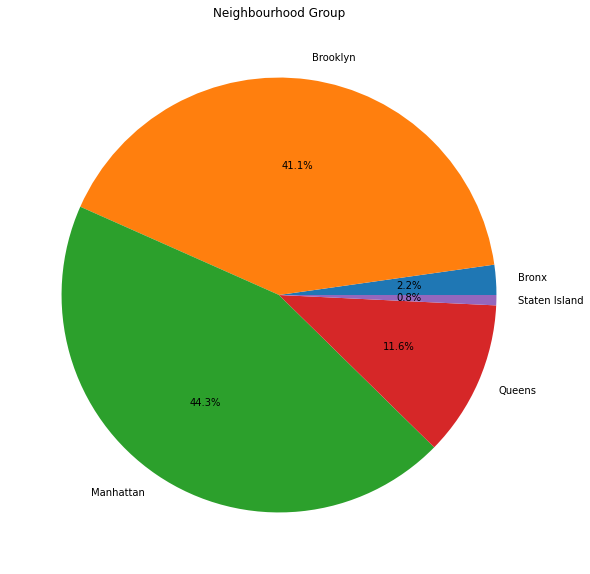

In [236]:
plt.rcParams['figure.figsize']= (15,10)
plt.title("Neighbourhood Group")
plt.pie(neighbourhoodgroup_df,labels=neighbourhoodgroup_df.index,autopct='%1.1f%%')
plt.show()

The pie chart above shows that the Manhattan, and Brooklyn has the highest share of hotels. 

In [237]:
# What can we learn about different hosts and areas?

# Top three hosts from Manhattan neighbourhood group
Manhattan_df = airbnb_df[airbnb_df['neighbourhood_group']=='Manhattan']
Manhattan_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)


,host_id,host_name,calculated_host_listings_count
15259,219517861,Sonder (NYC),327
13175,107434423,Blueground,230
8691,30283594,Kara,121


In [238]:
# Top three hosts from Brooklyn neighbourhood group
Brooklyn_df = airbnb_df[airbnb_df['neighbourhood_group']=='Brooklyn']
Brooklyn_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
4902,7503643,Vida,52
8854,26377263,Stat,35
13435,119669058,Melissa,34


In [239]:
# Top three hosts from Queens neighbourhood group
Queens_df = airbnb_df[airbnb_df['neighbourhood_group']=='Queens']
Queens_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
2826,137358866,Kazuya,79
1021,19303369,Hiroki,29
3705,242962235,Yuval,23


In [240]:
# Top three hosts from Bronx neighbourhood group
Bronx_df = airbnb_df[airbnb_df['neighbourhood_group']=='Bronx']
Bronx_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
8,310670,Vie,13
190,23878336,Armando,10
236,35783912,Pi & Leo,8


In [241]:
# Top three hosts from Staten_Island neighbourhood group
Staten_Island_df = airbnb_df[airbnb_df['neighbourhood_group']=='Staten Island']
Staten_Island_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
144,104812805,Amarjit S,8
102,50756378,Nina,7
164,137999892,Simranjeet,7


In [242]:
# Overall top three hosts 
overall_top_three_hosts = airbnb_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)
overall_top_three_hosts

,host_id,host_name,calculated_host_listings_count
34629,219517861,Sonder (NYC),327
29393,107434423,Blueground,232
19564,30283594,Kara,121


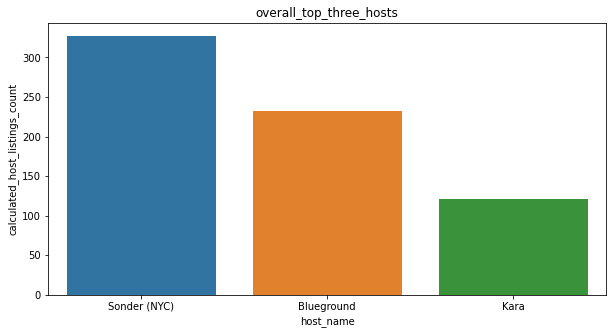

In [243]:

plt.rcParams['figure.figsize']= (10,5)
plt.title('overall_top_three_hosts')
sns.barplot(data=overall_top_three_hosts, x='host_name',y='calculated_host_listings_count')
plt.show()

Thus, it is clear from the above host tables of various neighbourhood groups and bar_graph that Manhattan has the maximum number of host count.

In [244]:
# Descriptive analysis of airbnb data
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [245]:
# from the descriptive analysis, it is clear that minimum price of booking is zero which is not possible, so for price exploration, we will neglect that values

price_df = airbnb_df[airbnb_df['price']!=0]

In [246]:
# Room types occupied by different neighbourhood groups
price_df.groupby(['neighbourhood_group','room_type']).agg({'room_type':'count','price':'mean'}).unstack()


room_type                                    price  \
room_type           Entire home/apt Private room Shared room Entire home/apt   
neighbourhood_group                                                            
Bronx                           379          651          60      127.506596   
Brooklyn                       9558        10126         411      178.346202   
Manhattan                     13198         7982         480      249.257994   
Queens                         2096         3372         198      147.050573   
Staten Island                   176          188           9      173.846591   

                                              
room_type           Private room Shared room  
neighbourhood_group                           
Bronx                  66.890937   59.800000  
Brooklyn               76.545428   50.773723  
Manhattan             116.776622   88.977083  
Queens                 71.762456   69.020202  
Staten Island          62.292553   57.444444

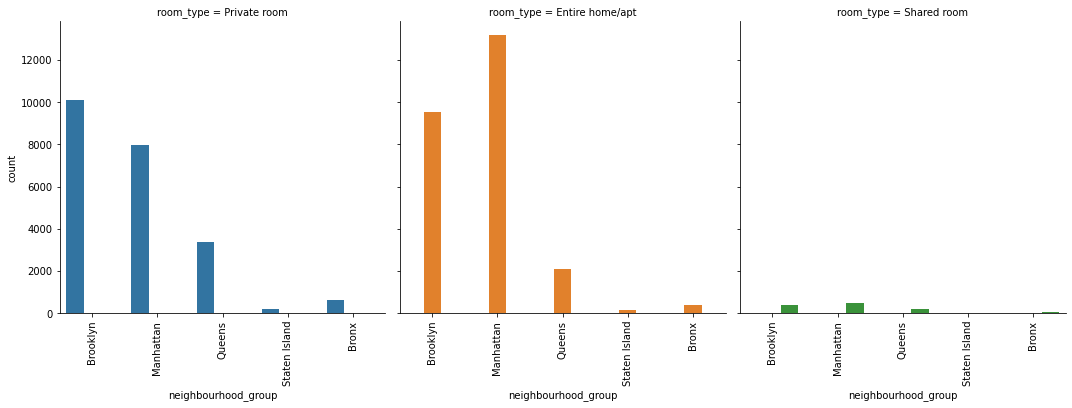

In [247]:
sns.catplot(x='neighbourhood_group' , hue='room_type', data= price_df,col= 'room_type',kind= 'count').set_xticklabels(rotation=90)
plt.show()

The graph shows that the entire Home/Apartment in Manhattan, while Private Rooms and Apartments in Brooklyn are almost equal. Above table shows that the people in NYC, people mainly go for either private room or entire home/apt. This shows that the people of NYC are more concerned about their privacy irrespective of the cost, that's why they rarely opt for shared rooms. 
The price of every category of the room are maximum in Manhatten followed by brooklyn.

In [248]:
# Top three hotels in Manhattan
Manhattan_top_3_hotels = Manhattan_df['name'].value_counts().head(3)
Manhattan_top_3_hotels=pd.DataFrame(Manhattan_top_3_hotels)
Manhattan_top_3_hotels.reset_index(inplace=True)
Manhattan_top_3_hotels.rename(columns={'index':'Top three hotels in Manhattan'}, inplace=True)
Manhattan_top_3_hotels.drop(['name'],axis= 1 ,inplace= True)
Manhattan_top_3_hotels


,Top three hotels in Manhattan
0,Harlem Gem
1,West Village Apartment
2,Cozy East Village Apartment


In [ ]:
# Top three hotels in Brooklyn
Brooklyn_top_3_hotels = Brooklyn_df['name'].value_counts().head(3)
Brooklyn_top_3_hotels=pd.DataFrame(Brooklyn_top_3_hotels)
Brooklyn_top_3_hotels.reset_index(inplace=True)
Brooklyn_top_3_hotels.rename(columns={'index':'Top three hotels in Brooklyn'}, inplace=True)
Brooklyn_top_3_hotels.drop(['name'],axis= 1 ,inplace= True)
Brooklyn_top_3_hotels


,Top three hotels in Brooklyn
0,Brooklyn Apartment
1,Loft Suite @ The Box House Hotel
2,Artsy Private BR in Fort Greene Cumberland


In [249]:
# Top three hotels in Brooklyn
Queens_top_3_hotels = Queens_df['name'].value_counts().head(3)
Queens_top_3_hotels=pd.DataFrame(Queens_top_3_hotels)
Queens_top_3_hotels.reset_index(inplace=True)
Queens_top_3_hotels.rename(columns={'index':'Top three hotels in Queens'}, inplace=True)
Queens_top_3_hotels.drop(['name'],axis= 1 ,inplace= True)
Queens_top_3_hotels

,Top three hotels in Queens
0,Hillside Hotel
1,Home away from home
2,New york Multi-unit building


In [ ]:
# Top three hotels in Brooklyn
Bronx_top_3_hotels = Bronx_df['name'].value_counts().head(3)
Bronx_top_3_hotels=pd.DataFrame(Bronx_top_3_hotels)
Bronx_top_3_hotels.reset_index(inplace=True)
Bronx_top_3_hotels.rename(columns={'index':'Top three hotels in Bronx'}, inplace=True)
Bronx_top_3_hotels.drop(['name'],axis= 1 ,inplace= True)
Bronx_top_3_hotels

,Top three hotels in Bronx
0,Prolonged Traveler's Dream (a month first & more)
1,Room with a View
2,Cozy home away from home


In [ ]:
# Top three hotels in Staten Island
Staten_Island_top_3_hotels = Staten_Island_df['name'].value_counts().head(3)
Staten_Island_top_3_hotels=pd.DataFrame(Staten_Island_top_3_hotels)
Staten_Island_top_3_hotels.reset_index(inplace=True)
Staten_Island_top_3_hotels.rename(columns={'index':'Top three hotels in Staten Island'}, inplace=True)
Staten_Island_top_3_hotels.drop(['name'],axis= 1 ,inplace= True)
Staten_Island_top_3_hotels

,Top three hotels in Staten Island
0,New York home ferry ride from Manhattan.
1,New York room with a view
2,Shared Loft in Charming Guest Suite (Front Right)


In [ ]:
# Top 10 neighbourhoods of Manhattan

Manhattan_df['neighbourhood'].value_counts().head(10)

Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [ ]:
# Listing of room types in Manhatten top ten neighbourhood
Manhatten_top_10_neighbourhood =Manhattan_df.loc[airbnb_df['neighbourhood'].isin(["Harlem","Upper West Side","Hell's Kitchen","East Village","Upper East Side","Midtown","East Harlem","Chelsea","Lower East Side","Washington Heights"])]
Manhatten_top_10_neighbourhood.groupby(['neighbourhood','room_type']).agg({'room_type':'count','price':'mean'}).unstack()

room_type                                    price  \
room_type          Entire home/apt Private room Shared room Entire home/apt   
neighbourhood                                                                 
Chelsea                        820          278          15      283.262195   
East Harlem                    486          586          45      189.545267   
East Village                  1170          660          23      226.305983   
Harlem                        1036         1573          49      177.595560   
Hell's Kitchen                1187          672          99      254.242628   
Lower East Side                506          367          38      234.397233   
Midtown                       1100          422          23      301.268182   
Upper East Side               1310          441          47      216.908397   
Upper West Side               1256          675          40      262.045382   
Washington Heights             296          576          27      137.270270   

                                             
room_type          Private room Shared room  
neighbourhood                                
Chelsea              156.741007  140.666667  
East Harlem           91.701365   65.044444  
East Village         118.333333   84.086957  
Harlem                81.950413   68.081633  
Hell's Kitchen       133.501488   95.838384  
Lower East Side      134.054496   50.736842  
Midtown              244.428910   98.130435  
Upper East Side      117.097506   83.808511  
Upper West Side      122.640000   95.225000  
Washington Heights    66.102431   68.629630

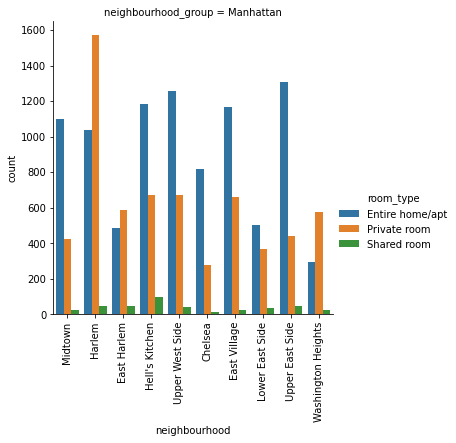

In [ ]:
# Listing of room types in Manhatten top ten neighbourhood graphically
sns.catplot(x='neighbourhood', hue='room_type',col= 'neighbourhood_group', data= Manhatten_top_10_neighbourhood, kind='count').set_xticklabels(rotation=90)
plt.show()

From the above graph, it is clear that 'Shared room' type Airbnb listing is rarely present in the Manhatten top ten neighbourhoods. Harelem has the most listing room availability because this area is famous for its elegant brownstones , various restaurant rows and and also it is not that expensive yearly dining event.
Washington heights has least listing room availability among the Marhatten top ten neighborhoods.Though it is cheapest among the top ten neighbourhoods but this area doesnot have chain stores like other neighbourhoods.
Chelsea is the most expensive neighbourhood of the Manhatten. Living in Chelsea offers residents a dense urban feel and there are a lot of bars, restaurants, coffee shops, and parks. these all amaneties of chelsea make it an expensive place.

In [ ]:
# Top 10 neighbourhoods of Brooklyn
Brooklyn_df['neighbourhood'].value_counts().head(10)

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Name: neighbourhood, dtype: int64

In [ ]:
# Listing of room types in Brooklyn top ten neighbourhood
Brooklyn_top_10_neighbourhood =Brooklyn_df.loc[airbnb_df['neighbourhood'].isin(["Williamsburg","Bedford-Stuyvesant","Bushwick","Crown Heights","Greenpoint","Flatbush","Clinton Hill","Prospect-Lefferts Gardens","Park Slope","East Flatbush"])]
Brooklyn_top_10_neighbourhood.groupby(['neighbourhood','room_type']).agg({'room_type':'count','price':'mean'}).unstack()

room_type                           \
room_type                 Entire home/apt Private room Shared room   
neighbourhood                                                        
Bedford-Stuyvesant                   1591         2038          85   
Bushwick                              678         1719          68   
Clinton Hill                          346          217           9   
Crown Heights                         759          780          25   
East Flatbush                         187          289          24   
Flatbush                              261          339          21   
Greenpoint                            622          476          17   
Park Slope                            366          139           1   
Prospect-Lefferts Gardens             281          242          12   
Williamsburg                         1891         1997          32   

                                    price                           
room_type                 Entire home/apt Private room Shared room  
neighbourhood                                                       
Bedford-Stuyvesant             154.780641    73.296860   50.376471  
Bushwick                       145.784661    62.623037   37.382353  
Clinton Hill                   243.982659    88.405530   49.000000  
Crown Heights                  159.631094    68.573077   50.880000  
East Flatbush                  130.855615    92.159170   41.958333  
Flatbush                       126.735632    67.823009   56.857143  
Greenpoint                     190.115756    88.462185   65.705882  
Park Slope                     205.860656    99.215827   78.000000  
Prospect-Lefferts Gardens      150.074733    67.917355   38.166667  
Williamsburg                   206.094130    85.761142   84.937500

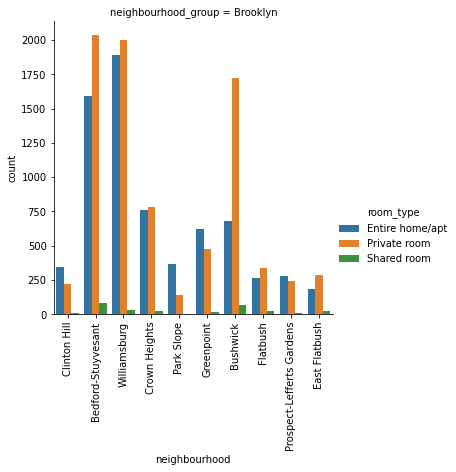

In [ ]:
# Listing of room types in Manhatten top ten neighbourhood graphically
sns.catplot(x='neighbourhood', hue='room_type',col= 'neighbourhood_group', data= Brooklyn_top_10_neighbourhood, kind='count').set_xticklabels(rotation=90)
plt.show()

From the above graph, it is clear that 'Shared room' type Airbnb listing is
rarely present in the Manhatten top ten neighbourhoods. Bedford-Stuyvesant and Williamsburg has the most listing room availability because both of these neighbourhood are best for millennials, families and neighbourhood vibes. East flatbush has least listing room availability among the Brooklyn top ten neighborhoods because this neighborhood offers the suburban Vibes.
Clinton hill is the most expensive neighbourhood because this area has very high demand for housing but supply in this area is low and thus the prices are climbing year after year.

In [ ]:
# availabilty of room among various neighbourhood groups
room_availabilty_df=airbnb_df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().unstack()
room_availabilty_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,158.000000,171.331288,154.216667
Brooklyn,97.205147,99.917983,178.007264
Manhattan,117.140996,101.845026,138.572917
Queens,132.267176,149.222716,192.186869
Staten Island,178.073864,226.361702,64.777778


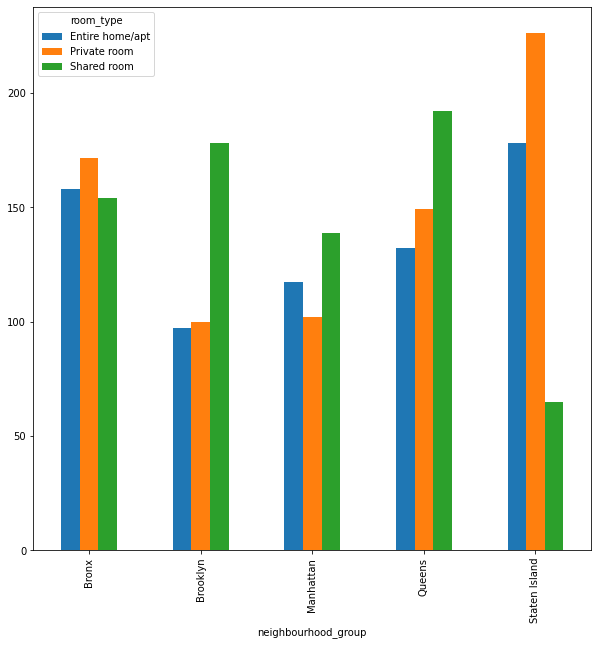

In [ ]:
# availabilty of rooms among various neighbourhood groups graphically
room_availabilty_df.plot(kind= 'bar')
plt.show()

Room availability in staten island is highest among all the groups because of its distance from the rest of the city

In [ ]:
# Traffic in a particular neghbourhood_group
traffic_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group','room_type']).agg({'reviews_per_month':'mean','price':'mean'}).unstack()
traffic_neighbourhood_group


reviews_per_month                           \
room_type             Entire home/apt Private room Shared room   
neighbourhood_group                                              
Bronx                        1.824749     1.319371    0.968833   
Brooklyn                     1.125341     0.990650    0.752010   
Manhattan                    0.862068     1.145254    1.329646   
Queens                       1.635038     1.548200    1.169091   
Staten Island                1.767955     1.437074    0.740000   

                              price                           
room_type           Entire home/apt Private room Shared room  
neighbourhood_group                                           
Bronx                    127.506596    66.788344   59.800000  
Brooklyn                 178.327545    76.500099   50.527845  
Manhattan                249.239109   116.776622   88.977083  
Queens                   147.050573    71.762456   69.020202  
Staten Island            173.846591    62.292553   57.444444

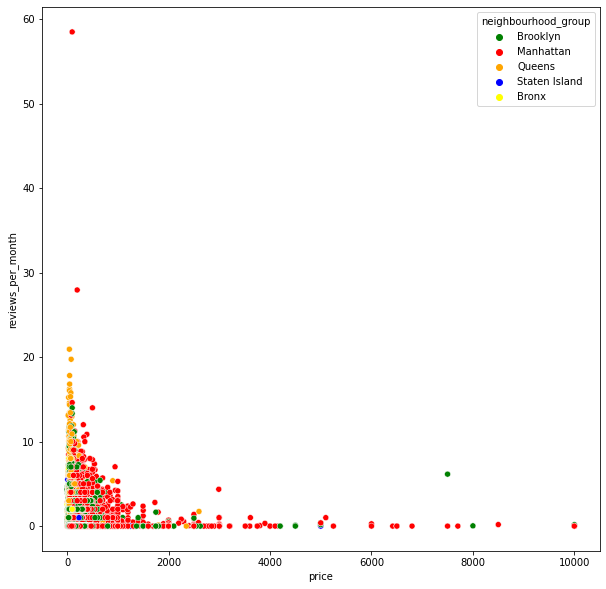

In [ ]:
plt.rcParams['figure.figsize']= (10,10)
sns.scatterplot(x='price',y='reviews_per_month',hue='neighbourhood_group',palette=['green','red','orange','blue','yellow'],legend='full',data=airbnb_df)
plt.show()

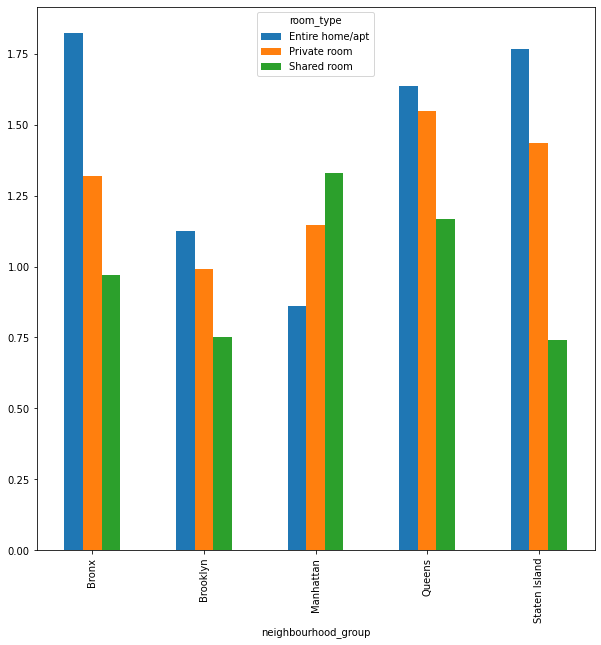

In [ ]:
traffic_neighbourhood_group['reviews_per_month'].plot(kind= 'bar')
plt.show()

From the above graph and traffic table, it is clear that 
 and 
1. Room type: Entire home/apt of Bronx has the highest traffic among all and the reason behind that may be the rates of entire room/apt is minimum among all the groups.
2. Room type: Private rooms of Queens has the highest traffic among all the groups. There is a very minute difference of $2.5 between the mean price of private rooms and shared rooms in Queens. Also private rooms provide privacy also. That's why people choose private rooms over shared rooms in Queens. 
3. Room type: Shared rooms of Manhatten has the highest traffic among all groups. Manhatten is a very expensive neighbourhood group of newyork and the rates of shared rooms is minimum as compared to the other room types in Manhatten. This might be the reason behind the highest traffic in shared room category in Manhatten.